Bacha: pohlídat audioknihy.
Bacha 2: filtrovat posmrtně vydané knihy.

In [121]:
import os
import re
import statistics
import pandas as pd

In [122]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [123]:
df = pd.read_parquet(os.path.join('data/cnb_sloupce','008.parquet'))

In [124]:
sloupce = ['leader','245','080','655','072','100','041','964']

In [125]:
for s in sloupce:
    pripojit = pd.read_parquet(os.path.join("data/cnb_sloupce",f"{s}.parquet"))
    df = df.merge(pripojit, left_index=True, right_index=True, how="left")

In [126]:
df.sample(30)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
srk19960121818,[960106s1980 xr muzeg |nn zxx],ncm a22 i 4500,[1],[0],[Orchestrální sóla pro hoboj /],None,[Lidmila Ježová],None,None,None,None,None,None,"[785.11, 78.082.1, 782.086, 78.087, (062.552),...","[MRF, MRF, MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9]","[orchestrální hudba, symfonie, operní výňatky,...","[fd980014, fd980015, fd994907, fd186703, fd163...","[czenas, czenas, czenas, czenas, czenas, czena...",None,None,None,None,"[7, 7]","[788, 37.016]","[Hudba pro dechové nástroje, Učební osnovy. Vy...","[Konspekt, Konspekt]","[9, 22]",[1],"[Ježová, Lidmila,]",[xx0125285],[aut],[1943-1998],None,None,None,None,[0],None,None,None,None,[cze],None,None,None,None,None,None,None,None,NaN
bk195906347,[980826s1959 xr cze],nam a22 1 4500,[0],[0],[Ekonomika československého průmyslu :],[album názorných pomůcek],None,None,None,None,None,None,None,[338(437)(084.2):658.5(084.2)],[undef],None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Průmysl čs. - ekonomika - pomůcky názorné]
cpg20051582843,[051005s2005 xr nnn g kncze],nkm a22 a 4500,[1],[0],[Krkonoše 2006],[měsíční nástěnný kalendář /],[foto Jiří Bruník ; grafická úprava Jan Dvořák],None,None,[[grafika] :],None,None,None,"[(437.31-17), (059)]","[MRF, MRF]",None,None,None,[7],[nástěnné vícelisté kalendáře],[fd185795],[czenas],None,None,None,None,NaN,NaN,NaN,NaN,NaN,[1],"[Bruník, Jiří,]",[jn20011018162],[pht],[1930-2008],None,None,None,None,[0],"[cze, ger, eng]",None,None,None,None,None,None,None,None,None,None,None,None,NaN
nkc20102089409,[100309s2010 xr acf e 000 1ccze],nam a22 a 4500,[1],[0],[Děti stepi :],[nové setkání s mámou Masajů /],[Hanna Schottová ; [z německého originálu .. p...,None,None,None,None,None,None,"[929, 27-76-055.2, 27-46, (=426.521), 27-726.6...","[MRF, MRF, MRF, MRF, MRF, MRF, MRF, MRF, MRF, ...",None,None,None,"[7, 9]","[biografické příběhy, biographical stories]","[fd131953, None]","[czenas, eczenas]",None,None,None,None,"[7, 7]","[27, 929]",[Křesťanství. Křesťanská církev všeobecně. Ekl...,"[Konspekt, Konspekt]","[5, 8]",[1],"[Schott, Hanna,]",[xx0088922],[aut],[1959-],None,None,None,None,[1],[cze],[ger],None,None,None,None,None,None,None,None,None,None,None,NaN
nkc20071712276,[070321s2005 xr acehe f 000 0 eng],nam a22 a 4500,[1],[0],[Prague Castle :],[detailed guide /],[[text and drawings Petr Chotěbor ; photograph...,None,None,None,None,None,None,"[72:904, (437.311), (036)]","[MRF, MRF, MRF]",None,None,None,"[7, 9]","[průvodce, guidebooks]","[fd133154, None]","[czenas, eczenas]",None,None,None,None,[7],[72],[Architektura],[Konspekt],[21],[1],"[Chotěbor, Petr,]",[jn19990216035],[aut],[1950-],None,None,None,None,[1],[eng],[cze],None,None,None,None,None,None,None,None,None,None,None,NaN
cpg20061662875,[060711s2006 xr nnn g kncze],nkm a22 a 4500,[1],[0],[Petr Balíček],[z cyklu Tváře (1973)],None,None,None,[[grafika] :],None,None,None,"[77.04, (437.3), (089.7)72/76]","[MRF, MRF, MRF]",None,None,None,[7],[pohlednice uměleckých děl],[fd133049],[czenas],None,None,None,None,NaN,NaN,NaN,NaN,NaN,[1],"[Balíček, Petr,]",[ola200206291],[pht],[1942-2020],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20071711309,[070306s2007 xr e f 000 0 cze],nam a22 a 4500,[0],[0],[Průvodce kurzem 152 400 Podniková ekonomika A :],[kombinované studium : eLearning : vzdělávací ...,[Zuzana Čvančarová ... [et al.]],None,None,None,None,None,None,"[378.6:62, 37.091.3, 37.091.3:004, 658, (437.3...

In [127]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 1238228 entries, ck8300078 to nkc20243632953
Data columns (total 55 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   008       1238228 non-null  object
 1   leader    1238228 non-null  object
 2   245_ind1  1238217 non-null  object
 3   245_ind2  1238217 non-null  object
 4   245_a     1238228 non-null  object
 5   245_b     598792 non-null   object
 6   245_c     1022186 non-null  object
 7   245_n     76402 non-null    object
 8   245_p     58319 non-null    object
 9   245_h     149934 non-null   object
 10  245_f     18 non-null       object
 11  245_s     5 non-null        object
 12  245_v     1 non-null        object
 13  080_a     1017378 non-null  object
 14  080_2     1017378 non-null  object
 15  080_x     5 non-null        object
 16  080_9     1 non-null        object
 17  080_ind1  1 non-null        object
 18  655_ind2  883796 non-null   object
 19  655_a     883796 non-null   obje

In [128]:
df = df.explode('008')

In [129]:
df[df['100_a'].astype(str).str.contains('Lednická, Karin',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpz20203232647,200625t20202020xr nnnng f n cze,nim a22 i 4500,[1],[0],[Šikmý kostel /],None,[Karin Lednická],None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],[aut],[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20213304795,210129m20202024xr ahf g 000 f cze,nam a22 ia4500,[1],[0],[Šikmý kostel :],[románová kronika ztraceného města /],[Karin Lednická],None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (437.326), (0:82-3...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],[aut],[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpz20213379057,211213t20212021xr nnnng f n cze,nim a22 i 4500,[1],[0],[Šikmý kostel.],None,[Karin Lednická],"[Druhý díl,]",[Léta 1921-1945 /],None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],"[aut, nrt]",[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20223403237,220322s2022 xr ach g 000 f cze,nam a22 i 4500,[1],[0],[Životice :],[obraz (po)zapomenuté tragédie /],[Karin Lednická],None,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 9, 9, 9]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, None, None, None]","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],[aut],[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20223472496,221116s2022 xr g 000 f eng,nam a22 i 4500,[1],[4],[The leaning church :],[chronicle of a town that vanished: 1894-1921 /],[Karin Lednická ; English translation: Pavlína...,None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6)]","[MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],[aut],[1969-],None,None,None,None,[1],[eng],[cze],None,None,None,None,None,None,None,None,None,None,None,NaN
cpz20233520279,230512t20232022xr nnnng fz n cze,nim a22 i 4500,[1],[0],[Životice :],[obraz (po)zapomenuté tragédie /],[Karin Lednická],None,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7, 7]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, fd119452, fd20...","[czenas, czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25

In [130]:
df = df[(df["008"].str[15:17] == "xr") & (df["008"].str[35:38] == "cze")]

In [131]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 1080979 entries, ck8300078 to cpk20243632941
Data columns (total 55 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   008       1080979 non-null  object
 1   leader    1080979 non-null  object
 2   245_ind1  1080976 non-null  object
 3   245_ind2  1080977 non-null  object
 4   245_a     1080979 non-null  object
 5   245_b     515211 non-null   object
 6   245_c     896702 non-null   object
 7   245_n     65612 non-null    object
 8   245_p     52724 non-null    object
 9   245_h     115250 non-null   object
 10  245_f     16 non-null       object
 11  245_s     4 non-null        object
 12  245_v     1 non-null        object
 13  080_a     898079 non-null   object
 14  080_2     898079 non-null   object
 15  080_x     5 non-null        object
 16  080_9     1 non-null        object
 17  080_ind1  1 non-null        object
 18  655_ind2  777138 non-null   object
 19  655_a     777138 non-null   obje

In [132]:
df.sample(30)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpg20223444685,220826s2022 xr nnn g incze,nkm a22 i 4500,[1],[0],[Rozhledna Smrk /],None,[foto CBS Nakladatelství s.r.o. ; design Hana ...,None,None,None,None,None,None,"[725.012.28, (437.316), (089.7)904]","[MRF, MRF, MRF]",None,None,None,[7],[pohlednice kulturních památek],[fd133048],[czenas],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20132446447,130312s2012 xr a f 001 0 cze,nam a22 a 4500,[1],[0],"[Sociální ekonomika, sociální podnikání :]",[podnikání pro každého /],[Marie Dohnalová a kolektiv],None,None,None,None,None,None,"[334.012.44, (048.8:082)]","[MRF, MRF]",None,None,None,"[7, 9]","[kolektivní monografie, collective monographs]","[fd501537, None]","[czenas, eczenas]",None,None,None,None,[7],[334],[Formy organizace a spolupráce v ekonomice],[Konspekt],[4],[1],"[Dohnalová, Marie,]",[mzk2004228310],[aut],[1955-],None,None,None,None,[0],[cze],None,[eng],None,None,None,None,None,None,None,None,None,None,NaN
nkc20061656342,060523s2006 xr bc c d 001 0ccze,nam a22 a 4500,[1],[0],[Čeští cestovatelé a mořeplavci /],None,[Miloslav a Jiří Martínkové ; ilustroval Petr ...,None,None,None,None,None,None,"[910.4-051, 910.3/.4-051, (437.3), (031)929, (...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[biografické slovníky, publikace pro děti, bio...","[fd131906, fd133156, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,"[7, 7]","[91, 0/9-053.2]","[Geografie jako věda. Výzkum. Cestování, Liter...","[Konspekt, Konspekt]","[7, 26]",[1],"[Martínek, Miloslav,]",[mzk2006343265],[aut],[1943-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ck8901952,890208s1988 xr a e p u0|0 0 cze,nam a22 4500,[1],[0],[Elektrárny II /],None,[Milan Ondrášek],None,None,None,None,None,None,"[621.311.2, 621.3-1, (075.8)]","[MRF, MRF, MRF]",None,None,None,[7],[učebnice vysokých škol],[fd133772],[czenas],None,None,None,None,"[7, 7]","[621.3, 37.016]","[Elektrotechnika, Učební osnovy. Vyučovací pře...","[Konspekt, Konspekt]","[19, 22]",[1],"[Ondrášek, Milan]",[jx20050603025],[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpk19950112694,951221s1993 xr e 000 1 cze,nam a22 a 4500,[1],[0],[Vždyť miluješ svou lásku ke mně :],[(Franz Kafka - Milena Jesenská) /],[Karla Erbová],None,None,None,None,None,None,[885.0-1],[undef],None,None,None,[7],[poezie],[fd131936],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],[1],"[Erbová, Karla,]",[jk01030539],[aut],[1933-2024],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bk193402969,990825s1933 xr af e 000 0 cze,nam a22 1i 4500,[1],[0],[Katastrofální výskyt sosnokaze (Panolis flamm...,[Invasion de Panolis flammea en Slovaquie occi...,[Ant. Pfeffer],None,None,None,None,None,None,"[630.4, 581.526.426, 632.7, 630.41, (437.6), (...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,[7],[studie],[fd133597],[czenas],None,None,None,None,[7],[630],[Lesnictví],[Konspekt],[24],[1],"[Pfeffer, Antonín,]",[jk01092927],[aut],[1904-1997],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nos190101438,000605s1909 xr abef 001 cze,nam a22 1 4500,[1],[0],[Průvodce lázněmi Luhačovskými na Moravě a 70 ...,None,[sestavil Jakub Balhar],None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1],"[Balhar, Jakub,]",[jk01010684],[com],[1866-1950],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [133]:
df[df['100_a'].astype(str).str.contains('Lednická, Karin',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpz20203232647,200625t20202020xr nnnng f n cze,nim a22 i 4500,[1],[0],[Šikmý kostel /],None,[Karin Lednická],None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],[aut],[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20213304795,210129m20202024xr ahf g 000 f cze,nam a22 ia4500,[1],[0],[Šikmý kostel :],[románová kronika ztraceného města /],[Karin Lednická],None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (437.326), (0:82-3...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],[aut],[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpz20213379057,211213t20212021xr nnnng f n cze,nim a22 i 4500,[1],[0],[Šikmý kostel.],None,[Karin Lednická],"[Druhý díl,]",[Léta 1921-1945 /],None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],"[aut, nrt]",[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20223403237,220322s2022 xr ach g 000 f cze,nam a22 i 4500,[1],[0],[Životice :],[obraz (po)zapomenuté tragédie /],[Karin Lednická],None,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 9, 9, 9]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, None, None, None]","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],[aut],[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpz20233520279,230512t20232022xr nnnng fz n cze,nim a22 i 4500,[1],[0],[Životice :],[obraz (po)zapomenuté tragédie /],[Karin Lednická],None,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7, 7]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, fd119452, fd20...","[czenas, czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],"[aut, nrt]",[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df = df.explode("leader")

In [135]:
df = df[df["leader"].str[6].isin(["a", "t"])]

In [136]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 930735 entries, ck8300078 to cpk20243632941
Data columns (total 55 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   008       930735 non-null  object
 1   leader    930735 non-null  object
 2   245_ind1  930734 non-null  object
 3   245_ind2  930735 non-null  object
 4   245_a     930735 non-null  object
 5   245_b     414357 non-null  object
 6   245_c     804544 non-null  object
 7   245_n     59495 non-null   object
 8   245_p     49293 non-null   object
 9   245_h     8581 non-null    object
 10  245_f     14 non-null      object
 11  245_s     4 non-null       object
 12  245_v     1 non-null       object
 13  080_a     750540 non-null  object
 14  080_2     750540 non-null  object
 15  080_x     1 non-null       object
 16  080_9     0 non-null       object
 17  080_ind1  1 non-null       object
 18  655_ind2  630724 non-null  object
 19  655_a     630724 non-null  object
 20  655_7     63031

In [137]:
df[df['245_a'].astype(str).str.contains('Šikmý kostel',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20213304795,210129m20202024xr ahf g 000 f cze,nam a22 ia4500,[1],[0],[Šikmý kostel :],[románová kronika ztraceného města /],[Karin Lednická],None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (437.326), (0:82-3...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Lednická, Karin,]",[ola2007364650],[aut],[1969-],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 930735 entries, ck8300078 to cpk20243632941
Data columns (total 55 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   008       930735 non-null  object
 1   leader    930735 non-null  object
 2   245_ind1  930734 non-null  object
 3   245_ind2  930735 non-null  object
 4   245_a     930735 non-null  object
 5   245_b     414357 non-null  object
 6   245_c     804544 non-null  object
 7   245_n     59495 non-null   object
 8   245_p     49293 non-null   object
 9   245_h     8581 non-null    object
 10  245_f     14 non-null      object
 11  245_s     4 non-null       object
 12  245_v     1 non-null       object
 13  080_a     750540 non-null  object
 14  080_2     750540 non-null  object
 15  080_x     1 non-null       object
 16  080_9     0 non-null       object
 17  080_ind1  1 non-null       object
 18  655_ind2  630724 non-null  object
 19  655_a     630724 non-null  object
 20  655_7     63031

In [139]:
df = df[~df["leader"].str[7].isin(["b", "i", "s", " "])]

In [140]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 888140 entries, ck8300078 to cpk20243632941
Data columns (total 55 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   008       888140 non-null  object
 1   leader    888140 non-null  object
 2   245_ind1  888140 non-null  object
 3   245_ind2  888140 non-null  object
 4   245_a     888140 non-null  object
 5   245_b     389468 non-null  object
 6   245_c     801985 non-null  object
 7   245_n     59171 non-null   object
 8   245_p     47818 non-null   object
 9   245_h     3438 non-null    object
 10  245_f     11 non-null      object
 11  245_s     2 non-null       object
 12  245_v     1 non-null       object
 13  080_a     709224 non-null  object
 14  080_2     709224 non-null  object
 15  080_x     1 non-null       object
 16  080_9     0 non-null       object
 17  080_ind1  1 non-null       object
 18  655_ind2  602326 non-null  object
 19  655_a     602326 non-null  object
 20  655_7     60193

In [141]:
def najdi_rok(nn8):
    if nn8[6] in ['s', 't', 'd', 'm', 'e', 'c','u', 'r']:
        try:
            return int(nn8[7:11])
        except Exception as e:
            return None
        else:
            return None
    elif nn8[6] == 'q':
        try:
            rok1 = int(nn8[7:11])
            rok2 = int(nn8[11:15])
            if rok2 - rok1 <= 5:
                return int(statistics.median([rok1, rok2]))
            else:
                return None
        except:
            return None
    else:
        return None

In [142]:
def r(x):
    return x.groupby('rok').size().plot.bar(figsize=(25,5))

In [143]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [144]:
df = df.dropna(subset=["rok"])

<Axes: xlabel='rok'>

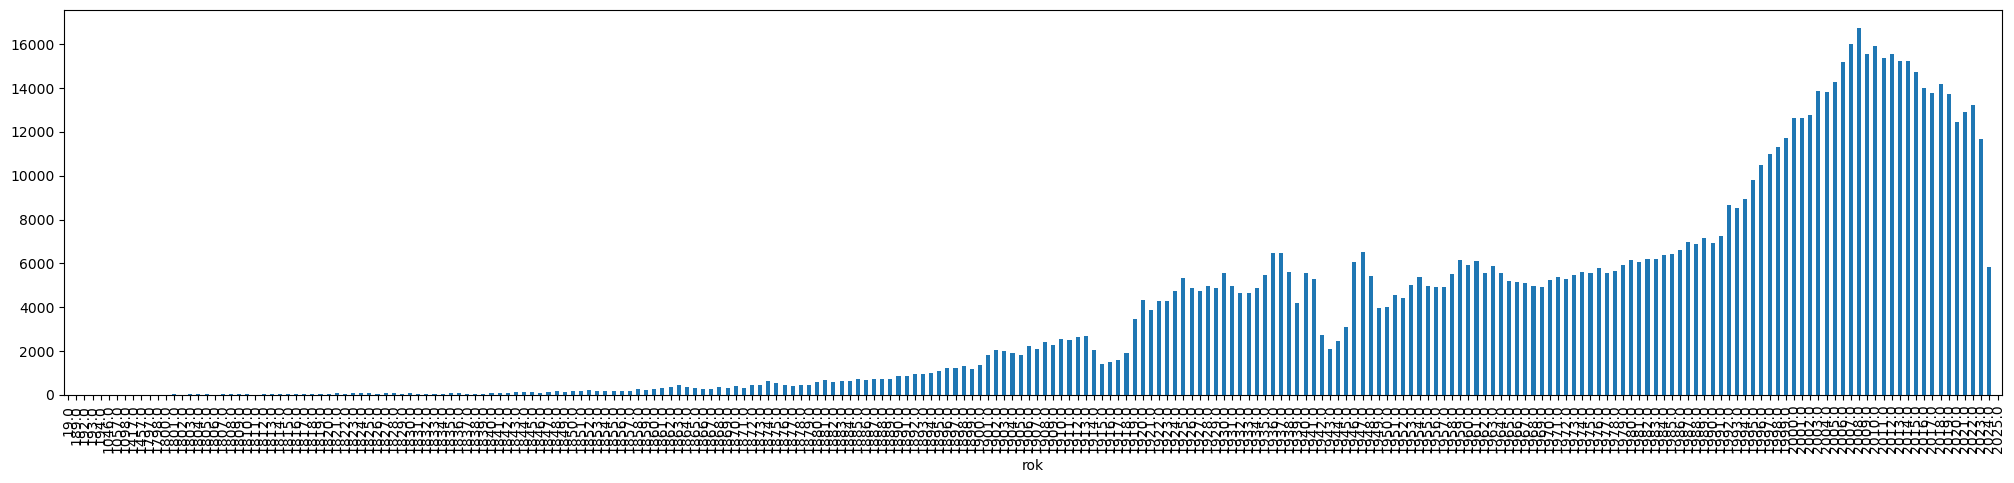

In [145]:
df.groupby("rok").size().plot.bar(figsize=(25,5))

In [146]:
df['245_a'].sample(50)

001
nkc20213302617                                    [O bolesti zad :]
bkn20010997831                             [Modlitby k Neznámému /]
nkc20102151907                                           [R.U.R. :]
cpk20010533687    [Prameny ke vpádům Bočkajovců na Moravu a k ra...
cpk20010887650                      [Ekonomika veřejného sektoru /]
nkc20142648333                        [Druhá zpověď smutný holky :]
nkc20081811531                              [Brehmův život zvířat.]
cpk19960149259                                [Sluneční děvčátko :]
nkc20193065259                                       [Český atlas.]
np9430388                                    [Vnitřní skutečnost /]
nos190115176                    [Illustrovaný průvodce po Sázavě /]
cpk20041324987                                     [O literatuře /]
nkc20162800819                                          [Povídky /]
nkc20061698273                                  [Podzim je tady! :]
bk196602229                                 

In [147]:
df.sample(10)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nos190241063,000807s1922 xr a 000 0 cze,nam a22 1i 4500,[1],[0],[Einsteinův názor o světě /],None,[napsal Vladimír Ryšavý],None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1],"[Ryšavý, Vladimír,]",[jk01103416],[aut],[1889-1950],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1922.0
bk193601221,990113s1936 xr cze,nam a22 1 4500,[1],[0],[Sušice :],[27 obrazů /],[tekst napsal Ant. Friedl ; mapu nakreslil Em....,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1],"[Friedl, Antonín,]",[jk01031937],[aut],[1869-1945],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1936.0
nkc20061695152,061027s2006 xr e p 000 0 cze,nam a22 a 4500,[1],[0],[Portugalština pro pokročilé =],[Português nível avançado /],"[Mária de Fátima Néry-Plch, Silvie Špánková, Z...",None,None,None,None,None,None,"[811.134.3, (075)]","[MRF, MRF]",None,None,None,"[7, 9]","[učebnice, textbooks]","[fd133770, None]","[czenas, eczenas]",None,None,None,None,"[7, 7]","[811.134, 37.016]","[Iberorománské jazyky, Učební osnovy. Vyučovac...","[Konspekt, Konspekt]","[11, 22]",[1],"[Néry-Plch, Fátima,]",[js20060505011],[aut],[1958-],None,None,None,None,[0],"[cze, por]",None,None,None,None,None,None,None,None,None,None,None,None,NaN,2006.0
nkc20051492756,200601s2005 xr a e 000 j cze,nam a22 a 4500,[1],[0],[Lunety :],[kalendářní čtivo /],[Jan Schneider],None,None,None,None,None,None,"[821.162.3-3, (0:82-4), (059)]","[MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 9, 9, 9]","[české prózy, fejetony, kalendáře, Czech prose...","[fd133972, fd132252, fd132513, None, None, None]","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Schneider, Jan,]",[jk01111048],"[aut, ill]",[1934-2014],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0
nkc20112189348,110628s2011 xr e e 000 0 cze,nam a22 a 4500,[1],[0],[Polsko-český slovník veřejných zakázek CPV /],None,[J. Vedral],None,None,None,None,None,None,"[811.162.1, 811.162.3, 351.712, 81'373.46, 81'...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[terminologické slovníky, dvojjazyčné překlado...","[fd202538, fd208746, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,"[7, 7]","[351, 81]","[Úkoly veřejné správy, správní opatření, legis...","[Konspekt, Konspekt]","[15, 11]",[1],"[Vedral, Jiří,]",[mzk2003169026],[aut],[1973-],None,None,None,None,[0],"[cze, pol]",None,None,None,None,None,None,None,None,None,None,None,None,NaN,2011.0
cpk20132469458,130624s1873 xr a g 000 1 cze,nam a22 aa4500,[1],[0],[Cestování po světě (co úvod do zeměpisu) /],None,[sepsal Fil. Stanisl. Kodym],None,None,None,None,None,None,"[913(100), (0.062)]","[MRF, MRF]",None,None,None,[7],[populárně-naučné publikace],[fd131864],[czenas],None,None,None,None,[7],[913],[Regionální geografie],[Konspekt],[7],[1],"[Kodym, Filip Stanislav,]",[jk01061051],[aut],[1811-1884],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1873.0
nos190107523,000209s1921 xr cze,nam a22 1 4500,[1],[0],[Tvar a melodický postup písma francouzského a...,None,[Václav Dědek],None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[1],"[Dědek, Václav]",None,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1921.0
bk195002179,980902s1950 xr cze,nam a22 1 4500,[1],[0],"[Matematic

In [148]:
df = df.dropna(subset=['245_a','100_a'])
df['titul'] = df['245_a'].apply(lambda x: x[0][:-1].strip() if x[0][-1] in [':','/',';','='] else x[0].strip())

## Kontroly divných věcí ze sešitu 112

In [150]:
df[df['245_a'].astype(str).str.contains('Malíř Láďa Rákos')]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## Finální export

In [152]:
ceska_proza = df[
    df['072_x'].astype(str).str.lower().str.contains('česká próza',na=False)
    | df['072_a'].astype(str).str.lower().str.contains('821.162.3-3',na=False)
    | df['080_a'].astype(str).str.contains('821.162.3-3',na=False)
    | df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)
    | (df['080_a'].astype(str).str.contains('885',na=False) & df['080_a'].astype(str).str.contains('82-3',na=False) & ~df['964_a'].astype(str).str.lower().str.contains('hry',na=False) & ~df['072_x'].astype(str).str.lower().str.contains('české drama',na=False))
    | df['080_a'].astype(str).str.contains('885-321.')
    | df['080_a'].astype(str).str.contains('885.0-31',na=False)
    | ((df['008'].str[33] == '1') & (df['041_h'].isnull()))
]
ceska_proza = ceska_proza[ceska_proza['100_a'].notnull()]
ceska_proza['autorstvo'] = ceska_proza['100_a'].apply(lambda x: ", ".join([y.replace(',','') for y in x]) if x != None else None)
ceska_proza['autorstvo_kod'] = ceska_proza['100_7'].apply(lambda x: x[0] if x != None else None)
ceska_proza2 = ceska_proza.sort_values(by='rok').drop_duplicates(subset=['titul','autorstvo'], keep='first')

C:\Users\micha\AppData\Local\Temp\ipykernel_27952\1202386092.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  | df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)


In [153]:
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].sample(20)

,rok,titul,autorstvo,autorstvo_kod
001,,,,
nkc20122389368,2012.0,Mlžná tvrz,Rusková Dana,xx0125099
nkc20223443136,2022.0,Všechno se v dobré obrátí,Suchý Adam,ola200206544
nkc20203255702,2021.0,Na stráži míru,Křivánek Jiří,xx0113684
bk196101313,1961.0,"Kupředu, čase! Čase, vpřed!",Petrmichl Jan,jk01092819
nkc20061693303,2006.0,Bild,Večeřa Jaroslav,mzk2006363742
nkc20203239872,2020.0,Kniha o tichu,Formánek Josef,xx0014575
bk197404951,1974.0,K vrcholu Tirič Míru,Šedivý Vladimír,jk01122685
cpk19980326852,1998.0,Mach a Šebestová za školou,Macourek Miloš,jk01072813
bk197604170,1976.0,K mé kávě tvá dýmka,Šerberová Alžběta,jk01122766


<Axes: xlabel='rok'>

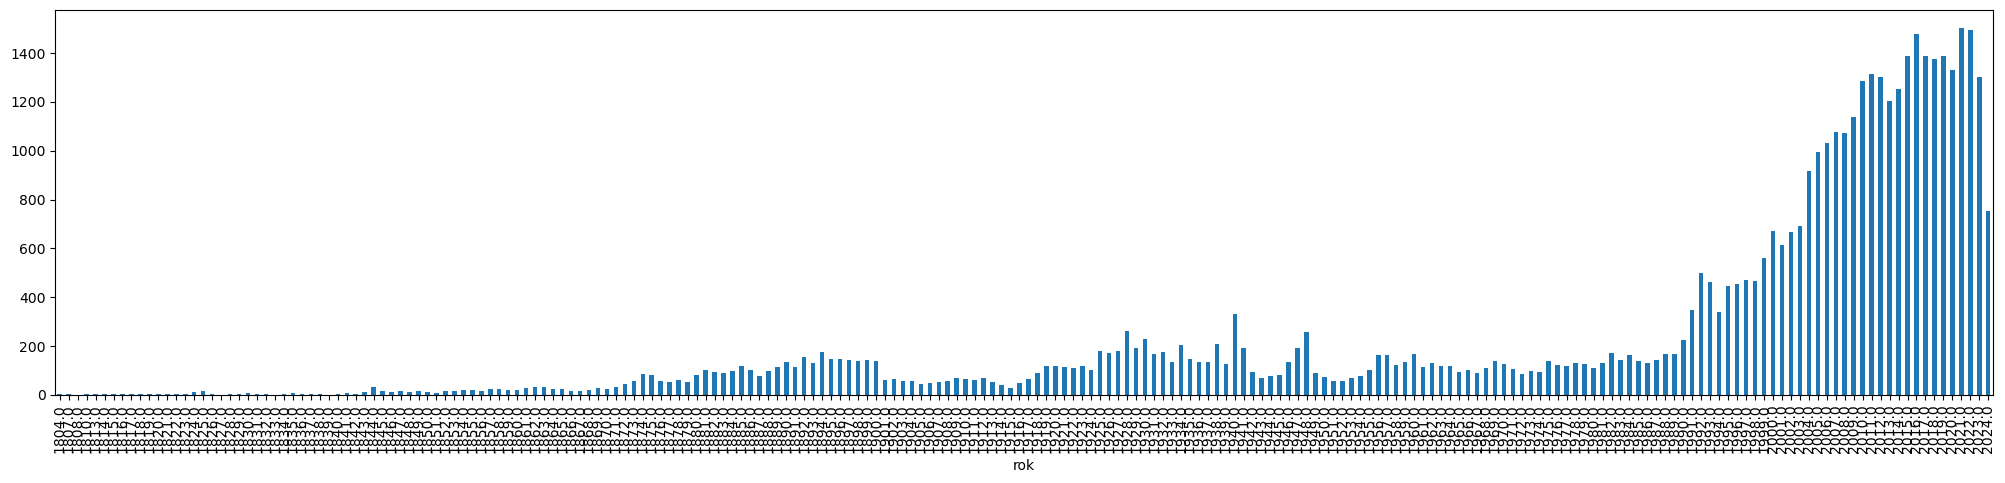

In [154]:
r(ceska_proza2)

In [155]:
ceska_proza2[ceska_proza2['rok'] == 1890].sample(20)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20071749619,070829s1890 xr j 000 m cze,nam a22 a 4500,[1],[0],[Zrnéčka :],[básničky pro mládež /],[sepsal Augustin Černý. Pověsti o městech a hr...,None,None,None,None,None,None,"[821-93, 821.162.3-1, 821.162.3-34, (0:82-1), ...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7]","[česká poezie, české pověsti, publikace pro děti]","[fd133958, fd201456, fd133156]","[czenas, czenas, czenas]",None,None,None,None,"[7, 7]","[821.162.3, 821-93]","[Česká literatura, Literatura pro děti a mláde...","[Konspekt, Konspekt]","[25, 26]",[1],"[Černý, Augustin,]",[jk01021508],[aut],[1853-1938],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Zrnéčka,Černý Augustin,jk01021508
nkc20071763459,071113s1890 xr a g 000 j cze,nam a22 a 4500,[1],[0],[Z Čech až na konec světa /],None,[dle pamětí o staročeském cestování vypravuje ...,None,None,None,None,None,None,"[821.162.3-32, 929.7, 910.4, (4-15), (0:82-321...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7]","[české povídky, historické povídky, cestopisné...","[fd133971, fd132412, fd131952]","[czenas, czenas, czenas]",None,None,None,None,"[7, 7]","[821.162.3-3, 913(4)]","[Česká próza, Geografie Evropy, reálie, cestov...","[Konspekt, Konspekt]","[25, 7]",[1],"[Jirásek, Alois,]",[jk01051816],[aut],[1851-1930],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Z Čech až na konec světa,Jirásek Alois,jk01051816
cpk20041413239,040817s1890 xr a b 000 m cze,nam a22 a 4500,[1],[0],[Jarní ohlasy :],[povídky a básničky pro útlý věk /],[napsala Lud. Grossmannová Brodská ; illustrov...,None,None,None,None,None,None,"[821-93, 821.162.3-1, 821.162.3-32]","[MRF, MRF, MRF]",None,None,None,"[7, 7, 7]","[publikace pro děti, česká poezie, české povídky]","[fd133156, fd133958, fd133971]","[czenas, czenas, czenas]",None,None,None,None,"[7, 7]","[821.162.3, 821-93]","[Česká literatura, Literatura pro děti a mláde...","[Konspekt, Konspekt]","[25, 26]",[1],"[Grossmannová Brodská, Ludmila,]",[jk01032742],[aut],[1859-1935],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Jarní ohlasy,Grossmannová Brodská Ludmila,jk01032742
bknaus00127,010317s1890 xr e 000 j cze,nam a22 1 4500,[1],[0],[Z mojí galerie obrázkův :],[novellistické črty a humoresky /],[naps. Vácslav Beneš-Šumavský],None,None,None,None,None,None,[821.162.3-32],[MRF],None,None,None,[7],[české povídky],[fd133971],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Beneš Šumavský, Václav,]",[jk01011652],[aut],[1850-1934],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Z mojí galerie obrázkův,Beneš Šumavský Václav,jk01011652
nkc20102129761,101005s1890 xr g 000 1bcze,nam a22 a 4500,[1],[0],[Tomáš Alva Edison a jeho fonograf /],None,[[J. Mařík]],None,None,None,None,None,None,"[621.3-051, 001.894-051, 681.843, (73), (092)]","[MRF, MRF, MRF, MRF, MRF]",None,None,None,[7],[biografie],[fd131909],[czenas],None,None,None,None,"[7, 7]","[621.3, 929]","[Elektrotechnika, Biografie]","[Konspekt, Konspekt]","[19, 8]",[1],"[Mařík, J.]",[jx20101005005],[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Tomáš Alva Edison a jeho fonograf,Mařík J.,jx20101005005
bknjaj10421,020520s1890 xr a e 000 j cze,nam a22 1 4500,[1],[0],[Z posledních stanic :],[povídky z ústavů: Blázinec - Porodnice - Nale...,[Rud. Jar. Kronbauer ; illustroval Viktor Oliva],"[[I,]",[Blázinec] /],None,None,None,None,"[821.162.3-3

In [156]:
len(ceska_proza2)

47419

In [158]:
ceska_proza2[ceska_proza2['autorstvo'] == 'Němcová Božena']

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20122433977,121221m18451848xr g 000 f cze,nam a22 ia4500,[1],[0],[Národní báchorky a powěsti /],None,[od Boženy Němcowé],None,None,None,None,None,None,"[821.162.3-34, (0:82-34)]","[MRF, MRF]",None,None,None,[7],[české pohádky],[fd133970],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Němcová, Božena,]",[jk01083016],[aut],[1820-1862],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1845.0,Národní báchorky a powěsti,Němcová Božena,jk01083016
cpk20223420309,220509m18541855xr g 000 f cze,nam a22 ia4500,[1],[0],[Národní Báchorky a Pověsti od Boženy Němcové],None,None,None,None,None,None,None,None,"[821.162.3-34, (0:82-34)]","[MRF, MRF]",None,None,None,"[7, 7]","[české pověsti, české pohádky]","[fd201456, fd133970]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Němcová, Božena,]",[jk01083016],[aut],[1820-1862],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1854.0,Národní Báchorky a Pověsti od Boženy Němcové,Němcová Božena,jk01083016
bknhak08992,030516s1855 xr e 000 f cze,nam a22 a 4500,[1],[0],[Babička :],[obrazy venkovského života /],[od Boženy Němcové],None,None,None,None,None,None,"[821.162.3-3, (0:82-3)]","[MRF, MRF]",None,None,None,"[7, 9]","[české prózy, Czech prose]","[fd133972, None]","[czenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Němcová, Božena,]",[jk01083016],[aut],[1820-1862],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1855.0,Babička,Němcová Božena,jk01083016
cpk20132502523,131002s1856 xr 000 1 cze,nam a22 aa4500,[1],[0],[Pohorská vesnice :],[povídka ze života lidu venkovského /],[od Boženy Němcové],None,None,None,None,None,None,"[821.162.3-3, (0:82-3)]","[MRF, MRF]",None,None,None,"[7, 9]","[české prózy, Czech prose]","[fd133972, None]","[czenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Němcová, Božena,]",[jk01083016],[aut],[1820-1862],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1856.0,Pohorská vesnice,Němcová Božena,jk01083016
bknhak09084,030517m18571858xr e 000 1 cze,nam a22 1 4500,[1],[0],[Slovenské pohádky a pověsti.],None,[od Boženy Němcové],[Sv. I-X /],None,None,None,None,None,"[821.162.4-34, (0:82-34)]","[MRF, MRF]",None,None,None,"[7, 7]","[slovenské pohádky, slovenské pověsti]","[fd133448, fd219004]","[czenas, czenas]",None,None,None,None,[7],[821.162.4],[Slovenská literatura],[Konspekt],[25],[1],"[Němcová, Božena,]",[jk01083016],[aut],[1820-1862],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1857.0,Slovenské pohádky a pověsti.,Němcová Božena,jk01083016
nkc20061643751,060220s1862 xr g 000 m cze,nam a22 a 4500,[1],[0],[Chýže pod horami :],[obrázek ze Slovenska ; O dvanácti měsíčkách :...,[od Boženy Němcové],None,None,None,None,None,None,"[821.162.3-32, 821.162.4-34]","[MRF, MRF]",None,None,None,"[7, 7]","[české povídky, slovenské pohádky]","[fd133971, fd133448]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],[1],"[Němcová, Božena,]",[jk01083016],[aut],[1820-1862],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1862.0,Chýže pod horami,Němcová Božena,jk01083016
cpk20132447922,130320s1862 xr e 000 j cze,nam a22 aa4500,[1],[0],[Drobné povídky /],None,[od Boženy Němcové],None,None,None,None,None,None,[821.162.3-32],[MRF],None,None,None,[7],[české povídky],[fd133

In [159]:
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].to_json(os.path.join("data","cnb_ceska_proza.json"), orient="index", indent=4)
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].to_parquet(os.path.join("data","cnb_ceska_proza.parquet"))